# Classification with Support Vector Machines

### Imports

In [2]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Load Data

In [3]:
df = pd.read_csv('../../data/00-raw-data/wiki-crawl-results.csv')

### Re-format data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

index = 0 : label = Women's rights
index = 1 : label = Men's rights


### Vectorize

In [7]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(420, 9960) (420,) (420,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = 0.7983


### Baseline: Random Classifier

In [29]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(y1)


-----RANDOM CLASSIFIER-----
count of prediction: dict_values([194, 226])
probability of prediction: [0.46190476 0.53809524]
accuracy 0.46904761904761905
precision, recall, fscore, (array([0.67525773, 0.2920354 ]), array([0.45017182, 0.51162791]), array([0.54020619, 0.37183099]), array([291, 129], dtype=int64))


### Split Data

In [16]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

In [17]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (336, 9960)
<class 'numpy.ndarray'> (336,)
<class 'numpy.ndarray'> (84, 9960)
<class 'numpy.ndarray'> (84,)


In [21]:
accuracy_training_l = []
accuracy_test_l = []

### Train Linear Kernel

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model = model.fit(x_train, y_train)

### Check the Results

In [23]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

In [24]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING (Linear)------
ACCURACY: 0.9791666666666666
RECALL: 0.9791666666666666
PRECISION: 0.9792452237305179


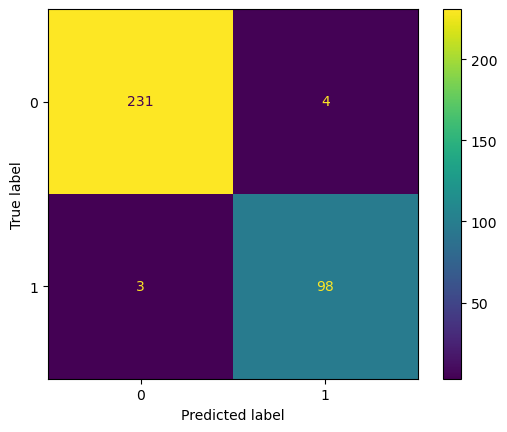

------TEST (Linear)------
ACCURACY: 0.7976190476190477
RECALL: 0.7976190476190477
PRECISION: 0.7964912280701755


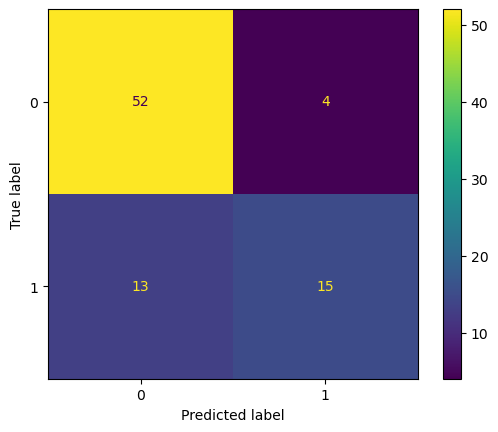

In [25]:
print("------TRAINING (Linear)------")
confusion_plot(y_train,yp_train)
print("------TEST (Linear)------")
confusion_plot(y_test,yp_test)

### Train Gaussian Kernel

In [30]:
model = SVC(kernel='rbf')
model = model.fit(x_train, y_train)

### Check the Results

In [31]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Gaussian)------
ACCURACY: 0.9791666666666666
RECALL: 0.9791666666666666
PRECISION: 0.9791720259532384


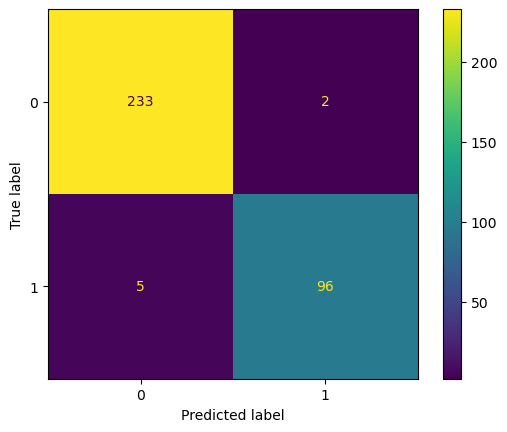

------TEST (Gaussian)------
ACCURACY: 0.6785714285714286
RECALL: 0.6785714285714286
PRECISION: 0.6493506493506493


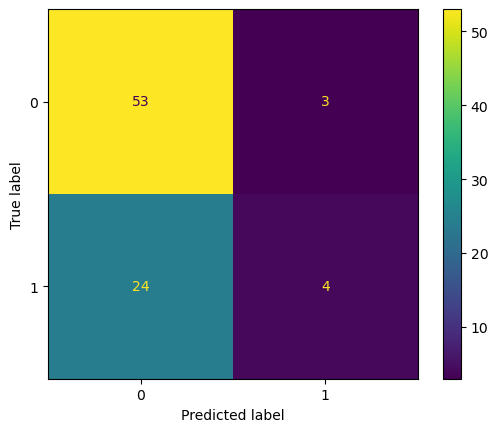

In [32]:
print("------TRAINING (Gaussian)------")
confusion_plot(y_train,yp_train)
print("------TEST (Gaussian)------")
confusion_plot(y_test,yp_test)

### Train Sigmoid Kernel

In [33]:
model = SVC(kernel='sigmoid')
model = model.fit(x_train, y_train)

### Check the Results

In [34]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.9583333333333334
RECALL: 0.9583333333333334
PRECISION: 0.9591369514838903


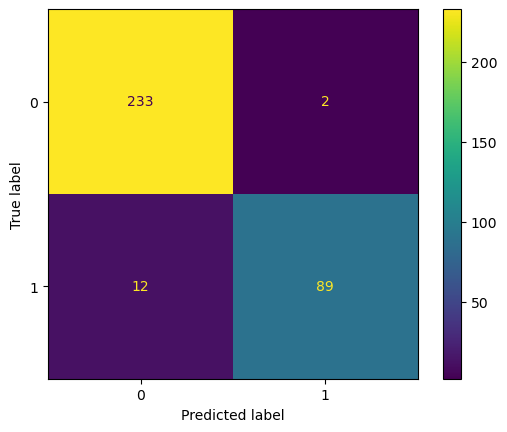

------TEST (Sigmoid)------
ACCURACY: 0.75
RECALL: 0.75
PRECISION: 0.7658779576587795


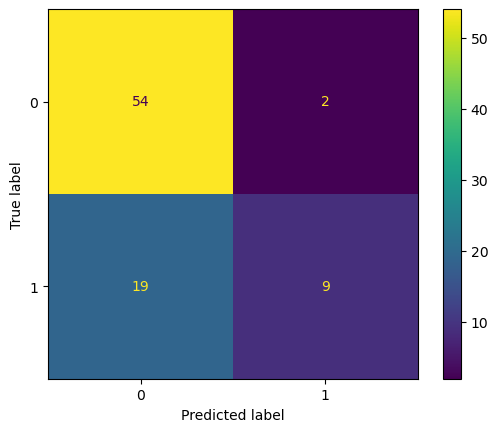

In [35]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Polynomial Kernel Hyperparameter Tuning

degree :  training acc , test acc
1 :  0.9791666666666666 , 0.75
degree :  training acc , test acc
2 :  0.9077380952380952 , 0.6428571428571429
degree :  training acc , test acc
3 :  0.8690476190476191 , 0.6428571428571429
degree :  training acc , test acc
4 :  0.8541666666666666 , 0.6428571428571429
degree :  training acc , test acc
5 :  0.8541666666666666 , 0.6428571428571429
degree :  training acc , test acc
6 :  0.8541666666666666 , 0.6428571428571429
degree :  training acc , test acc
7 :  0.8482142857142857 , 0.6428571428571429
degree :  training acc , test acc
8 :  0.8422619047619048 , 0.6428571428571429
degree :  training acc , test acc
9 :  0.8422619047619048 , 0.6428571428571429
degree :  training acc , test acc
10 :  0.8422619047619048 , 0.6428571428571429


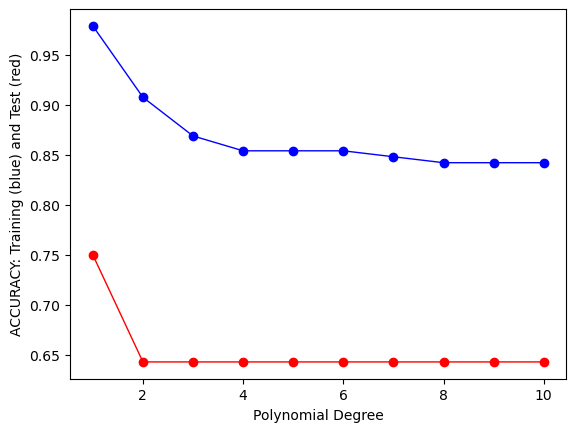

In [36]:
accuracies_train = []
accuracies_test = []
numbers = range(1, 11)

for i in numbers:
    model = SVC(kernel='poly', degree = i)
    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    
    cm_train = confusion_matrix(y_train, yp_train)
    ac_train = accuracy_score(y_train, yp_train)
    
    cm_test = confusion_matrix(y_test, yp_test)
    ac_test = accuracy_score(y_test, yp_test)
    
    print('degree', ': ', 'training acc' , ',', 'test acc')
    print(i, ": ", ac_train, ',', ac_test)
    
    accuracies_train.append(ac_train)
    accuracies_test.append(ac_test)
    
plt.plot(numbers, accuracies_train, linewidth=1, color='b')
plt.scatter(numbers, accuracies_train, c='b')
plt.plot(numbers, accuracies_test, linewidth=1, color='r')
plt.scatter(numbers, accuracies_test, c='r')
plt.xlabel("Polynomial Degree")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.style.use('fivethirtyeight')
plt.show();

plt.style.use('default')


### Train Polynomial Kernel

In [37]:
model = SVC(kernel = 'poly', degree = 1)
model = model.fit(x_train, y_train)

### Check the Results

In [38]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.9791666666666666
RECALL: 0.9791666666666666
PRECISION: 0.979127824858757


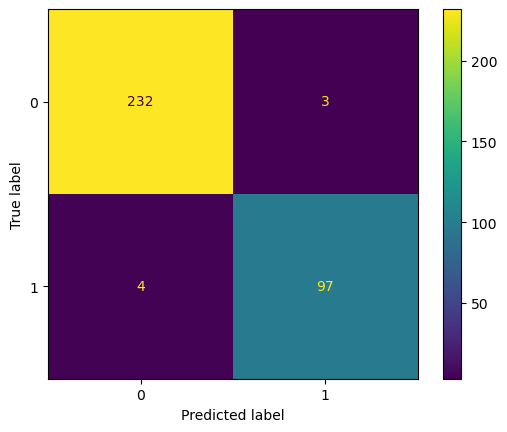

------TEST (Sigmoid)------
ACCURACY: 0.75
RECALL: 0.75
PRECISION: 0.7468599033816425


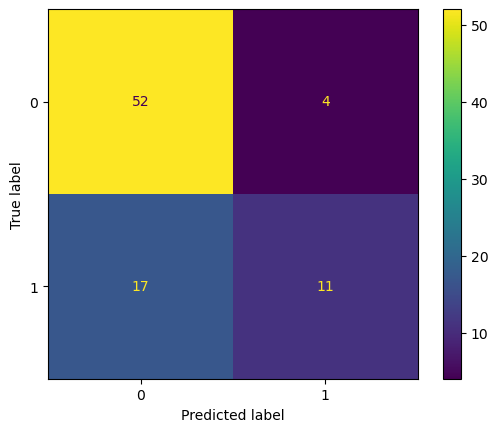

In [39]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Comparing Models

In [40]:
kernel_types = ['Linear', 'Gaussian', 'Sigmoid', 'Polynomial']

d = {"Kernels": kernel_types, "Training Accuracy": accuracy_training_l, "Test Accuracy": accuracy_test_l}
df = pd.DataFrame(d)
df = df.sort_values(by=["Test Accuracy"], ascending=False)

[Text(0, 0, 'Linear'),
 Text(1, 0, 'Sigmoid'),
 Text(2, 0, 'Polynomial'),
 Text(3, 0, 'Gaussian')]

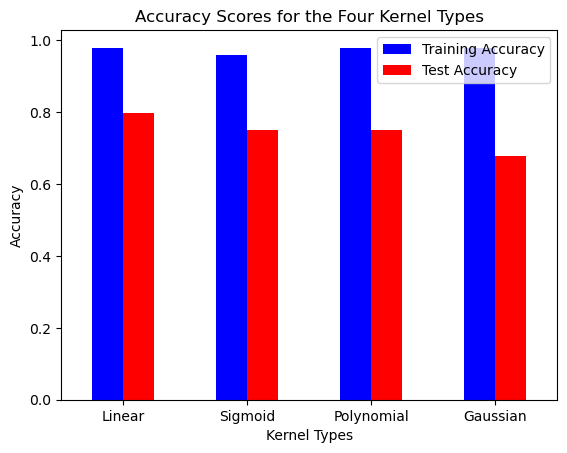

In [41]:
ax = df.plot(kind='bar', color=['b', 'r'])
plt.ylabel('Accuracy')
plt.xlabel('Kernel Types')
plt.title('Accuracy Scores for the Four Kernel Types')
plt.xticks(rotation = 0)
ax.set_xticklabels(df['Kernels'])